In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('D:\Ayaan\YEAR 3\ML\Assesment2\imdb_10K_sentimnets_reviews.csv')

In [2]:
#Gathering information form the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [3]:
#Description of the dataset
data.describe()

,sentiment
count,10000.000000
mean,0.503700
std,0.500011
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [4]:
#Displaying first 10 rows from the data
data.head(10)

,review,sentiment
0,"Okay, I know this does'nt project India in a g...",1
1,Despite John Travolta's statements in intervie...,0
2,"I am a kung fu fan, but not a Woo fan. I have ...",1
3,He seems to be a control freak. I have heard h...,0
4,"Admittedly, there are some scenes in this movi...",1
5,I just watched Nightbreed for the first time s...,1
6,"The plot is about a female nurse, named Anna, ...",0
7,Having heard so much about the 1990s Cracker s...,0
8,Having been a faithful Asterix fan all of my l...,1
9,"I know little or nothing about astronomy, but ...",1


In [5]:
#counting the value of 1 and 0 (positive and negative)
data['sentiment'].value_counts()

1    5037
0    4963
Name: sentiment, dtype: int64

In [6]:
#importing necessary libraries
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# Data Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [7]:
import re

#functions for text cleaning
def clean_text(text):
    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Removing special characters, punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and lemmatization
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(clean_tokens)


data['review'] = data['review'].apply(clean_text)

In [8]:
    # Data Labeling
    
    X = data['review']
    y = data['sentiment']

In [9]:
#Splitting and testing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model= RandomForestClassifier()

In [11]:
#checking the data shape
data.shape

(10000, 2)

In [12]:
#prinitng all the testing and training data
print(y_train)
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

9254    1
1561    0
1670    1
6087    1
6669    0
       ..
5734    0
5191    0
5390    1
860     1
7270    1
Name: sentiment, Length: 8000, dtype: int64
(8000,)
(8000,)
(2000,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [28]:
 from sklearn.svm import SVC

# Model Building using linear method
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vectors, y_train)

SVC(kernel='linear')

In [29]:
# Model Evaluation
predictions = svm_model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, predictions)
#printing accuracy
print(f"Accuracy: {accuracy}")


Accuracy: 0.864


In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np


predictions = svm_model.predict(X_test_vectors)

# Calculating confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

unique_labels = np.unique(y_test)
print(unique_labels)

print("Confusion Matrix:")
print(conf_mat)


[0 1]
Confusion Matrix:
[[846 164]
 [108 882]]


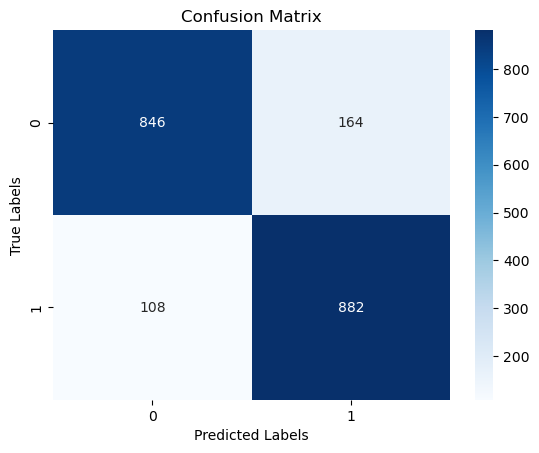

In [31]:
import seaborn as sns

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

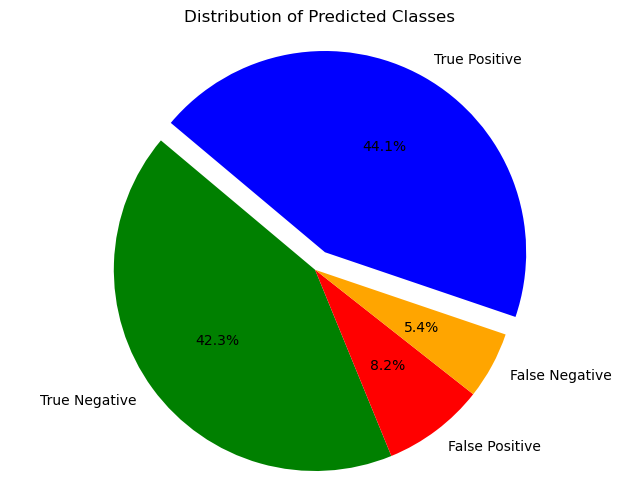

In [32]:
from sklearn.metrics import confusion_matrix


#Getting values from confusion matrix
tn, fp, fn, tp = conf_mat.ravel()

# Creating data
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sizes = [tn, fp, fn, tp]
colors = ['green', 'red', 'orange', 'blue']
explode = (0, 0, 0, 0.1)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio maeks sure that pie is drawn as a circle.
plt.title('Distribution of Predicted Classes')
plt.show()

In [33]:
    report = classification_report(y_test, predictions)
    print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1010
           1       0.84      0.89      0.87       990

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



In [34]:
import tkinter as tk
from tkinter import messagebox
from tkinter import scrolledtext
import joblib

# Save the model and vectorizer to files
joblib.dump(svm_model, 'your_model.pkl')
joblib.dump(vectorizer, 'your_vectorizer.pkl')


['your_vectorizer.pkl']

In [35]:
# Load model and vectorizer
svm_model = joblib.load('your_model.pkl')
vectorizer = joblib.load('your_vectorizer.pkl')



In [36]:
# Function to perform sentiment analysis prediction
def predict_sentiment():
    text = text_entry.get("1.0", 'end-1c')  # Retrieve text from the input field
    if not text.strip():
        messagebox.showwarning("Please enter text for analysis")
    else:
        # Cleaning and preprocessing the input text
        cleaned_text = clean_text(text)
        
        # Converting text data to numerical vectors
        text_vectors = vectorizer.transform([cleaned_text])
        
        # Making predictions using the SVM model
        prediction = svm_model.predict(text_vectors)
        
        # Display the result
        if prediction[0] == 1:
            result_label.config(text="Sentiment: Positive 😊")
        else:
            result_label.config(text="Sentiment: Negative 😔")
            

In [37]:
#Tkinter window
root = tk.Tk()
root.title("Sentiment Analysis")

''

In [38]:
#user input
text_entry = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=40, height=10, font=('Arial', 12))
text_entry.grid(row=0, column=0, padx=10, pady=10, columnspan=2)


In [39]:
# Button for sentiment analysis
analyze_button = tk.Button(root, text="Analyze Sentiment", command=predict_sentiment, borderwidth=2, padx=1, pady=10,font=('Arial', 12),cursor="hand2")
analyze_button.grid(row=1, column=0, padx=10, pady=10)


In [40]:
#to display prediction result
result_label = tk.Label(root, text="", font=('Arial', 12))
result_label.grid(row=1, column=1, padx=10, pady=10)

In [41]:
root.mainloop()